In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
data=pd.read_csv("empl.csv")
data.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [3]:
data.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [4]:
data.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

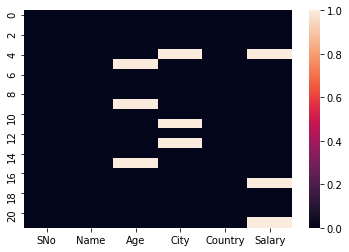

In [5]:
sns.heatmap(data.isnull())

In [6]:
Age_mean=data["Age"].mean()
Age_mean

32.421052631578945

In [7]:
data["Age"]=data["Age"].fillna(value=Age_mean)
data["Age"]

0     28.000000
1     31.000000
2     34.000000
3     26.000000
4     30.000000
5     32.421053
6     43.000000
7     38.000000
8     50.000000
9     32.421053
10    26.000000
11    30.000000
12    22.000000
13    43.000000
14    38.000000
15    32.421053
16    27.000000
17    31.000000
18    34.000000
19    32.000000
20    26.000000
21    27.000000
Name: Age, dtype: float64

In [8]:
Salary_mean=data["Salary"].mean()
Salary_mean

33739.94736842105

In [9]:
data["Salary"]=data["Salary"].fillna(value=Salary_mean)
data["Salary"]

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     33739.947368
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33739.947368
18    34432.000000
19    34534.000000
20    33451.000000
21    33739.947368
Name: Salary, dtype: float64

In [10]:
data=data.drop(["Name"],axis=1)

In [11]:
data=data.drop(["SNo"],axis=1)

In [12]:
data=data.drop(["Country"],axis=1)

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
data["City"]=imp.fit_transform(data["City"].values.reshape(-1,1))
data

,Age,City,Salary
0,28.000000,Toronto,20000.000000
1,31.000000,Edmonto,3900.000000
2,34.000000,Toronto,8000.000000
3,26.000000,HongKong,66672.000000
4,30.000000,HongKong,33739.947368
5,32.421053,HongKong,30007.000000
6,43.000000,BayArea,8300.000000
7,38.000000,Hyderabad,54666.000000
8,50.000000,newyork,67666.000000
9,32.421053,newyork,8888.000000


In [14]:
le=LabelEncoder()
list=["City"]
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))


In [15]:
data

,Age,City,Salary
0,28.000000,8,20000.000000
1,31.000000,3,3900.000000
2,34.000000,8,8000.000000
3,26.000000,5,66672.000000
4,30.000000,5,33739.947368
5,32.421053,5,30007.000000
6,43.000000,1,8300.000000
7,38.000000,6,54666.000000
8,50.000000,9,67666.000000
9,32.421053,9,8888.000000


In [16]:
x=data.iloc[:,0:2]
x

,Age,City
0,28.000000,8
1,31.000000,3
2,34.000000,8
3,26.000000,5
4,30.000000,5
5,32.421053,5
6,43.000000,1
7,38.000000,6
8,50.000000,9
9,32.421053,9


In [17]:
y=data.iloc[:,-1]
y

0     20000.000000
1      3900.000000
2      8000.000000
3     66672.000000
4     33739.947368
5     30007.000000
6      8300.000000
7     54666.000000
8     67666.000000
9      8888.000000
10    66672.000000
11    34344.000000
12    30007.000000
13     8300.000000
14    54666.000000
15    67666.000000
16     8888.000000
17    33739.947368
18    34432.000000
19    34534.000000
20    33451.000000
21    33739.947368
Name: Salary, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [22]:
lm=LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm.score(x_train,y_train)

0.09778144517832343

In [26]:
pred=lm.predict(x_test)
pred

array([31188.55571963, 22868.49241782,  9122.28307099, 37561.47969131,
       25294.67185379])

In [27]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
0,20000.0,31188.555720
13,8300.0,22868.492418
8,67666.0,9122.283071
1,3900.0,37561.479691
15,67666.0,25294.671854


In [28]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 32066.71458079589
Mean Squared Error: 1338643241.2331662
Root Mean Squared Error: 36587.47382962052
